ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [14]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

---

## **DIRECT ANSWER:**

**Given Data:** [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]

### **1. Median and IQR Computation:**
- **Sorted data:** [30, 31, 32, 32, 33, 33, 34, 34, 35, 500]
- **Median (Q2):** 33.0 (average of 5th and 6th values)
- **Q1 (First Quartile):** 32.0
- **Q3 (Third Quartile):** 34.0
- **IQR (Interquartile Range):** Q3 - Q1 = 34.0 - 32.0 = **2.0**

### **2. Outlier Detection Using IQR Rule:**
- **Lower fence:** Q1 - 1.5 × IQR = 32 - 1.5(2) = 32 - 3 = **29**
- **Upper fence:** Q3 + 1.5 × IQR = 34 + 1.5(2) = 34 + 3 = **37**
- **Conclusion:** 500 > 37, therefore **500 is an outlier**

### **3. Why Median + IQR is Better Than Mean + SD:**
Median and IQR are **robust statistics** that depend on position rather than magnitude, making them resistant to outliers. The extreme value 500 drastically inflates the mean (79.4) and standard deviation (147.8), rendering them unrepresentative of typical customer spending. In contrast, the median (33) accurately reflects the central tendency of the majority, and the IQR (2) shows that the middle 50% of customers have spending concentrated in a narrow range. For this right-skewed dataset with an outlier, median and IQR provide more meaningful and interpretable summaries of customer behavior.

---

## **QUESTION ANALYSIS:**

This question assesses three fundamental statistical concepts:

1. **Manual calculation** of resistant measures (median, quartiles, IQR)
2. **Application** of Tukey's fences method for outlier detection  
3. **Understanding** when robust statistics outperform parametric measures

The dataset is deliberately designed with an extreme outlier (500 vs. 30-35) to demonstrate the breakdown of mean/SD and the superiority of median/IQR in skewed distributions.

---

## **DETAILED ANSWER ANALYSIS WITH THEORY:**

### **Part 1: Computing Median and IQR**

**Median (Second Quartile):**
- The median is the **middle value** that divides sorted data into two equal halves
- With n=10 (even count), median = (5th value + 6th value) / 2
- Sorted data: [30, 31, 32, 32, **33, 33**, 34, 34, 35, 500]
- Median = (33 + 33) / 2 = **33.0**
- **Property:** 50% of customers spend ≤ $33

**Quartiles:**
- **Q1 (25th percentile):** Median of lower half → **32.0**
  - Separates lowest 25% from upper 75%
- **Q3 (75th percentile):** Median of upper half → **34.0**  
  - Separates lowest 75% from upper 25%

**IQR (Interquartile Range):**
- IQR = Q3 - Q1 = 34 - 32 = **2.0**
- Represents the **spread of the middle 50%** of data
- **Key property:** Resistant measure—unaffected by extreme values outside the middle 50%

### **Part 2: IQR Rule for Outlier Detection**

**Tukey's Fences Method (1.5 × IQR Rule):**

Standard outlier boundaries:
- **Lower fence:** Q1 - 1.5 × IQR = 32 - 1.5(2) = **29**
- **Upper fence:** Q3 + 1.5 × IQR = 34 + 1.5(2) = **37**

**Decision rule:** Any observation < 29 or > 37 is flagged as an outlier

**Application to our data:**
- All values [30, 31, 32, 32, 33, 33, 34, 34, 35] are within [29, 37] ✓
- Value 500 >> 37, therefore **500 is a confirmed outlier**

**Statistical theory:** Under normal distribution, approximately **99.3%** of data falls within these fences. The multiplier 1.5 balances:
- **Sensitivity:** Detecting true outliers
- **Specificity:** Avoiding false positives
- Stricter rule (3 × IQR) would only flag extreme outliers

### **Part 3: Robust vs Non-Robust Statistics**

**Comparative Analysis:**

| Statistic | Value | Robust? | Interpretation |
|-----------|-------|---------|----------------|
| **Mean** | 79.4 | ❌ No | Severely distorted by 500 |
| **Median** | 33.0 | ✅ Yes | Accurately represents typical spending |
| **Std Dev** | 147.8 | ❌ No | Larger than most data values |
| **IQR** | 2.0 | ✅ Yes | Shows tight clustering of 50% |

**Why Median + IQR is Superior for This Dataset:**

1. **Resistance to Outliers:**
   - Median uses only **positional information** (middle rank), not magnitude
   - One extreme value cannot inflate it
   - The outlier 500 doesn't change that 50% of customers spend ≤ $33

2. **Representative Central Tendency:**
   - Mean = $79.40 misleadingly suggests typical spending is ~$79
   - Reality: 9 out of 10 customers (90%) spend $30-35
   - Median = $33 accurately captures this typical behavior

3. **Meaningful Spread Measure:**
   - SD = $147.8 is **larger than most observations**, making it uninformative
   - IQR = $2 shows middle 50% of customers concentrated in narrow $32-34 range
   - IQR directly interpretable: "Half the customers spend within $2 of each other"

4. **Handling Skewed Distributions:**
   - Data is **heavily right-skewed** due to the outlier
   - Mean/SD assume **symmetric distribution** (e.g., normal)
   - Median/IQR are **distribution-free** (non-parametric)—work for any shape

**Related Statistical Concepts:**

- **Breakdown Point:** Median has **50% breakdown point** (can resist up to 50% outliers). Mean has **0% breakdown point** (one extreme value makes it arbitrarily large).

- **Parametric vs Non-Parametric:** Mean/SD are parametric (assume distribution shape). Median/IQR are non-parametric (distribution-free).

- **Box Plot Visualization:** Perfect for this data—shows Q1, Median, Q3, IQR, and outliers clearly.

- **Real-world Application:** In income/wealth data, expenditure analysis, or any domain with occasional extreme values, robust statistics prevent misleading conclusions.

**Conclusion:** For this customer spending dataset with an extreme outlier, median and IQR provide accurate, interpretable summaries that reflect typical behavior, while mean and standard deviation are distorted and misleading.

### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

---

## **DIRECT ANSWER:**

**Given:**
- Prevalence (disease rate): 1%
- Sensitivity: 90%
- Specificity: 92%

### **1. Positive Predictive Value (PPV) Calculation:**

**Step 1:** Define probabilities:
- P(Disease) = 0.01
- P(No Disease) = 0.99
- P(Test+ | Disease) = 0.90 (Sensitivity)
- P(Test- | No Disease) = 0.92 (Specificity)
- P(Test+ | No Disease) = 1 - 0.92 = 0.08 (False Positive Rate)

**Step 2:** Calculate P(Test+) using Law of Total Probability:
```
P(Test+) = P(Test+ | Disease) × P(Disease) + P(Test+ | No Disease) × P(No Disease)
P(Test+) = (0.90 × 0.01) + (0.08 × 0.99)
P(Test+) = 0.009 + 0.0792
P(Test+) = 0.0882
```

**Step 3:** Apply Bayes Theorem:
```
PPV = P(Disease | Test+) = P(Test+ | Disease) × P(Disease) / P(Test+)
PPV = (0.90 × 0.01) / 0.0882
PPV = 0.009 / 0.0882
PPV = 0.102 or 10.2%
```

**Result:** Only **10.2%** of people who test positive actually have the disease.

### **2. Effect of Prevalence Increase to 20%:**

When prevalence increases from 1% to 20%, the PPV **increases significantly** to approximately **73.8%**. This happens because Bayes theorem weights the prior probability (prevalence) heavily. With higher prevalence, there are more true positives relative to false positives in the population. The numerator P(Test+ | Disease) × P(Disease) grows faster than the denominator P(Test+), since true positive cases increase substantially while false positives remain proportional to the shrinking healthy population. Thus, a positive test becomes much more reliable evidence of disease when the disease is more common.

---

## **QUESTION ANALYSIS:**

This question tests understanding of:

1. **Bayes Theorem application** in medical/ML screening scenarios
2. **Conditional probability** manipulation (sensitivity, specificity, PPV)
3. **Base rate effect** (how prevalence impacts predictive value)
4. **Practical interpretation** of screening test results

The counterintuitive result (only 10.2% PPV despite 90% sensitivity) demonstrates the critical importance of base rates in probabilistic reasoning—a fundamental concept in ML classification problems.

---

## **DETAILED ANSWER ANALYSIS WITH THEORY:**

### **Part 1: Computing PPV Using Bayes Theorem**

**Understanding the Terms:**

1. **Prevalence (Prior Probability):**
   - P(Disease) = 0.01 → 1% of population has the disease
   - P(No Disease) = 0.99 → 99% are healthy

2. **Sensitivity (True Positive Rate):**
   - P(Test+ | Disease) = 0.90
   - If you have the disease, 90% chance test detects it
   - Also called **Recall** in ML classification

3. **Specificity (True Negative Rate):**
   - P(Test- | No Disease) = 0.92
   - If you're healthy, 92% chance test correctly says negative
   - Complement: P(Test+ | No Disease) = 0.08 → **False Positive Rate**

4. **PPV (Positive Predictive Value):**
   - P(Disease | Test+) = ?
   - **What we want:** If test says positive, what's the probability you actually have the disease?
   - Also called **Precision** in ML classification

**Bayes Theorem Formula:**

$$P(\text{Disease} \mid \text{Test+}) = \frac{P(\text{Test+} \mid \text{Disease}) \times P(\text{Disease})}{P(\text{Test+})}$$

**Step-by-Step Calculation:**

**Step 1:** Calculate total probability of testing positive (denominator):

Using **Law of Total Probability**:
$$P(\text{Test+}) = P(\text{Test+} \mid \text{Disease}) \times P(\text{Disease}) + P(\text{Test+} \mid \text{No Disease}) \times P(\text{No Disease})$$

Substituting values:
$$P(\text{Test+}) = (0.90 \times 0.01) + (0.08 \times 0.99)$$
$$P(\text{Test+}) = 0.009 + 0.0792 = 0.0882$$

**Interpretation:** 8.82% of the total population tests positive (both true and false positives combined).

**Step 2:** Apply Bayes Theorem:

$$\text{PPV} = \frac{0.90 \times 0.01}{0.0882} = \frac{0.009}{0.0882} = 0.102$$

**Result:** PPV = **10.2%**

**What This Means (Confusion Matrix Perspective):**

In a population of 10,000 people:
- **Disease present:** 10,000 × 0.01 = 100 people
  - Test positive (True Positives): 100 × 0.90 = **90**
  - Test negative (False Negatives): 100 × 0.10 = 10
- **No disease:** 10,000 × 0.99 = 9,900 people
  - Test positive (False Positives): 9,900 × 0.08 = **792**
  - Test negative (True Negatives): 9,900 × 0.92 = 9,108

**Total testing positive:** 90 + 792 = 882 people

**PPV = True Positives / All Positives = 90 / 882 = 0.102 = 10.2%**

**Key Insight:** Despite high sensitivity (90%), the low prevalence (1%) means false positives (792) far outnumber true positives (90), resulting in low PPV.

### **Part 2: Effect of Prevalence Increase to 20%**

**Recalculating with 20% Prevalence:**

Given:
- P(Disease) = 0.20
- P(No Disease) = 0.80
- Sensitivity and specificity unchanged

**Step 1:** New P(Test+):
$$P(\text{Test+}) = (0.90 \times 0.20) + (0.08 \times 0.80)$$
$$P(\text{Test+}) = 0.18 + 0.064 = 0.244$$

**Step 2:** New PPV:
$$\text{PPV} = \frac{0.90 \times 0.20}{0.244} = \frac{0.18}{0.244} = 0.738$$

**New Result:** PPV = **73.8%**

**Comparison:**

| Prevalence | PPV | Interpretation |
|------------|-----|----------------|
| 1% | 10.2% | Low reliability—mostly false positives |
| 20% | 73.8% | High reliability—mostly true positives |

**Why PPV Increases:**

1. **More True Positives:**
   - At 1% prevalence: 100 people have disease → 90 true positives
   - At 20% prevalence: 2,000 people have disease → 1,800 true positives
   - True positives increase by **20×**

2. **Fewer False Positives:**
   - At 1% prevalence: 9,900 healthy → 792 false positives
   - At 20% prevalence: 8,000 healthy → 640 false positives
   - False positives decrease by ~19%

3. **Numerator vs Denominator Growth:**
   - In Bayes formula, numerator P(Test+ | Disease) × P(Disease) grows **linearly** with prevalence
   - Denominator P(Test+) grows **sublinearly** because:
     - True positive contribution increases
     - False positive contribution decreases (fewer healthy people)
   - **Result:** Ratio increases dramatically

**Mathematical Insight:**

As prevalence increases:
- Numerator: 0.90 × prevalence (linear growth)
- Denominator: 0.90 × prevalence + 0.08 × (1 - prevalence)
- Denominator grows slower because second term shrinks

**ML Classification Analogy:**

- **Low prevalence (imbalanced classes):** Even high-recall classifiers have low precision
- **High prevalence (balanced classes):** Same classifier achieves both high recall and precision
- **Base Rate Effect:** Prior probability strongly influences posterior probability
- **Practical implication:** In ML, class imbalance requires careful threshold tuning or resampling

**Related Statistical Concepts:**

1. **Base Rate Fallacy:** Ignoring prevalence leads to overestimating PPV—common cognitive bias

2. **Precision-Recall Tradeoff:** In ML, similar tradeoff between catching all positives (sensitivity/recall) vs. being sure about positives (PPV/precision)

3. **ROC vs PR Curves:** ROC curves can be misleading with imbalanced data; Precision-Recall curves better show base rate effects

4. **Bayesian Updating:** As we gather more evidence (higher prevalence = stronger prior), posterior probability shifts dramatically

**Conclusion:** PPV is critically dependent on disease prevalence (base rate). A test with fixed sensitivity and specificity becomes much more reliable as prevalence increases, because the ratio of true positives to false positives improves. This principle applies directly to ML classification problems with imbalanced datasets.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

---

## **DIRECT ANSWER:**

### **1. Type of ML Task:**
**Binary Classification** - Predicting a binary target variable (`premium_user` with values 0 or 1) based on input features.

### **2. Four Preprocessing Steps:**
- **Handle Missing Values:** Impute missing values in `age` and `daily_clicks` using median or mean imputation
- **Encode Categorical Variables:** One-hot encode or label encode the `region` feature (7 levels)
- **Feature Scaling:** Standardize or normalize numeric features (`age`, `daily_clicks`) to similar scales
- **Handle Class Imbalance:** Check target distribution and apply SMOTE, class weights, or resampling if imbalanced

### **3. End-to-End ML Pipeline:**

The complete ML pipeline starts with **exploratory data analysis (EDA)** to understand feature distributions, missing values, correlations, and class balance in `premium_user`. Next, **data preprocessing** includes imputing missing values in numeric columns, encoding the categorical `region` variable using one-hot encoding, and scaling features with StandardScaler or RobustScaler. After preprocessing, I would **split the data** into training and test sets (80/20 or 70/30) using stratified sampling to preserve class proportions. For **model selection**, I would train multiple algorithms like Logistic Regression (baseline), Decision Trees, Random Forest, and Gradient Boosting, using cross-validation to tune hyperparameters. **Model evaluation** would involve computing metrics like accuracy, precision, recall, F1-score, and ROC-AUC, with emphasis on metrics appropriate for the business context (e.g., recall if false negatives are costly). Finally, I would **interpret results** using feature importance or coefficients, validate on the test set, and deploy the best model with monitoring for performance degradation. Throughout the pipeline, I'd document decisions and maintain reproducibility through version control and clear code structure.

---

## **QUESTION ANALYSIS:**

This question evaluates understanding of:

1. **Problem formulation:** Recognizing binary classification from dataset structure
2. **Preprocessing knowledge:** Identifying appropriate data preparation steps
3. **ML workflow comprehension:** Articulating the full pipeline from data to deployment
4. **Practical ML thinking:** Considering real-world concerns like class imbalance and model interpretability

The dataset design (numeric + categorical features, binary target) represents a common real-world ML scenario, testing whether students can translate problem specifications into actionable ML steps.

---

## **DETAILED ANSWER ANALYSIS WITH THEORY:**

### **Part 1: Identifying the ML Task Type**

**Binary Classification Task**

**Justification:**
- **Target variable:** `premium_user` with values {0, 1}
- **Two classes:** Non-premium (0) and premium (1) users
- **Prediction goal:** Classify new users into one of two categories
- **Not regression:** Target is categorical, not continuous

**ML Task Taxonomy:**
- **Supervised Learning:** We have labeled data (target `premium_user` is known)
- **Classification:** Predicting discrete categories
- **Binary:** Exactly two classes (vs. multi-class with 3+ categories)

**Alternative Perspective:**
Could be framed as **probability estimation** (predicting P(premium_user=1)), but the fundamental task is still binary classification.

**Related ML Concepts:**
- **Logistic Regression:** Natural baseline for binary classification
- **Decision boundary:** Algorithms learn to separate two classes in feature space
- **Threshold tuning:** Can adjust probability threshold (default 0.5) based on business needs

### **Part 2: Four Essential Preprocessing Steps**

**1. Handle Missing Values**

**Why important:**
Most ML algorithms cannot handle NaN/null values directly and will either error or silently drop incomplete rows, losing valuable data.

**Strategies:**
- **Numeric features** (`age`, `daily_clicks`):
  - **Median imputation:** Robust to outliers (preferred for skewed data)
  - **Mean imputation:** Simple, works for symmetric distributions
  - **Predictive imputation:** Use other features to predict missing values (advanced)
- **Categorical features** (`region`):
  - **Mode imputation:** Fill with most frequent category
  - **Create "Missing" category:** Preserve missingness as information

**When to apply:** After EDA but before encoding/scaling

**2. Encode Categorical Variables**

**Why important:**
ML algorithms require numeric inputs; categorical variables must be converted to numerical representations.

**For `region` (7 levels, nominal categorical):**

**One-Hot Encoding (Preferred):**
- Creates 7 binary columns (or 6 with drop_first=True to avoid multicollinearity)
- Each column represents one region: [1, 0, 0, 0, 0, 0, 0]
- **Pros:** No ordinal assumption, works with all algorithms
- **Cons:** Increases dimensionality (curse of dimensionality with many categories)

**Label Encoding (Alternative):**
- Maps regions to integers: {0, 1, 2, 3, 4, 5, 6}
- **Pros:** Lower dimensionality, works for tree-based models
- **Cons:** Introduces false ordinality (model thinks region 6 > region 0)

**Target Encoding (Advanced):**
- Encode based on target mean per category
- Reduces dimensionality but risks data leakage

**When to apply:** After missing value imputation, before scaling

**3. Feature Scaling**

**Why important:**
Algorithms using distance metrics (Logistic Regression, SVM, KNN, Neural Networks) are sensitive to feature magnitudes. Unscaled features can dominate model training.

**Example problem:**
- `age` range: [18, 80] (scale: ~60)
- `daily_clicks` range: [0, 10000] (scale: ~10000)
- Without scaling, `daily_clicks` dominates distance calculations

**Scaling Methods:**

**StandardScaler (Z-score normalization):**
- Formula: $z = \frac{x - \mu}{\sigma}$
- Results in mean=0, std=1
- **When:** Data is approximately normal, few outliers

**RobustScaler:**
- Uses median and IQR instead of mean and std
- Formula: $z = \frac{x - \text{median}}{\text{IQR}}$
- **When:** Data has outliers (robust to extremes)

**MinMaxScaler:**
- Scales to [0, 1] range
- **When:** Need bounded output (e.g., for neural networks)

**Important:** 
- Fit scaler on training data only, then transform both train and test
- One-hot encoded features don't need scaling (already 0/1)
- Tree-based models (Random Forest, XGBoost) don't require scaling

**When to apply:** After encoding, before model training

**4. Handle Class Imbalance**

**Why important:**
If `premium_user=1` represents only 5% of data, a naive model can achieve 95% accuracy by always predicting 0, but this is useless for business.

**Detection:**
Check target distribution: `df['premium_user'].value_counts(normalize=True)`

**Mitigation Strategies:**

**Resampling:**
- **Oversampling minority:** Duplicate premium_user=1 samples
- **Undersampling majority:** Remove premium_user=0 samples
- **SMOTE:** Synthetic Minority Over-sampling Technique (creates synthetic examples)

**Algorithm-level:**
- **Class weights:** Penalize misclassifying minority class more (e.g., `class_weight='balanced'` in sklearn)
- Adjusts loss function: $L = w_0 \cdot L_0 + w_1 \cdot L_1$

**Metric-aware:**
- Don't rely on accuracy alone
- Use F1-score, precision-recall curves, ROC-AUC
- **Recall** important if missing premium users is costly

**Threshold tuning:**
- Lower threshold for positive class (e.g., 0.3 instead of 0.5)
- Increases recall at expense of precision

**When to apply:** After train-test split, before model training

### **Part 3: End-to-End ML Pipeline**

**Complete Pipeline Architecture:**

**Phase 1: Data Understanding (EDA)**

**Goals:**
- Understand feature distributions
- Identify data quality issues
- Detect patterns and relationships

**Tasks:**
- **Summary statistics:** `df.describe()`, `df.info()`
- **Missing values:** `df.isnull().sum()`
- **Target distribution:** Check class balance
- **Feature distributions:** Histograms for `age`, `daily_clicks`
- **Categorical analysis:** Bar plot for `region` frequencies
- **Correlations:** Heatmap of numeric features vs. target
- **Outlier detection:** Box plots, IQR analysis

**Tools:** pandas, matplotlib, seaborn

**Phase 2: Data Preprocessing**

**Pipeline steps in order:**
1. Handle missing values (imputation)
2. Encode categorical variables (one-hot encoding)
3. Split data (train/test stratified split)
4. Scale numeric features (fit on train only)
5. Address class imbalance (SMOTE or class weights)

**Scikit-learn Pipeline:**
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])
```

**Phase 3: Train-Test Split**

**Strategy:**
- **Split ratio:** 80/20 or 70/30
- **Stratification:** Use `stratify=y` to preserve class proportions
- **Random state:** Set seed for reproducibility

**Code:**
```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
```

**Phase 4: Model Selection and Training**

**Baseline Model:**
- Start with **Logistic Regression** (simple, interpretable, fast)
- Establishes performance benchmark

**Additional Models:**
- **Decision Trees:** Handle non-linearity, interpretable
- **Random Forest:** Ensemble method, reduces overfitting
- **Gradient Boosting (XGBoost/LightGBM):** Often best performance
- **SVM:** Good for complex decision boundaries
- **Neural Networks:** For large datasets with complex patterns

**Cross-Validation:**
- Use 5-fold or 10-fold CV on training set
- Estimates generalization performance
- Prevents overfitting to validation set

**Hyperparameter Tuning:**
- **Grid Search:** Exhaustive search over parameter grid
- **Random Search:** Sample parameter combinations randomly
- **Bayesian Optimization:** Smart search (advanced)

**Phase 5: Model Evaluation**

**Metrics for Binary Classification:**

**Confusion Matrix:**
```
                Predicted
                0       1
Actual  0      TN      FP
        1      FN      TP
```

**Key Metrics:**
- **Accuracy:** (TP + TN) / Total - Overall correctness
- **Precision:** TP / (TP + FP) - Of predicted premium, how many are correct?
- **Recall (Sensitivity):** TP / (TP + FN) - Of actual premium, how many caught?
- **F1-Score:** Harmonic mean of precision and recall
- **ROC-AUC:** Area under ROC curve - Overall discrimination ability

**Metric Selection Based on Business Context:**
- **High recall priority:** Can't afford to miss premium users (e.g., churn prevention)
- **High precision priority:** Marketing budget limited, target only confident predictions
- **Balanced F1:** General-purpose metric

**ROC and Threshold Analysis:**
- Plot ROC curve (TPR vs. FPR)
- Identify optimal threshold for business needs
- AUC = 0.5 (random), AUC = 1.0 (perfect)

**Phase 6: Model Interpretation**

**Feature Importance:**
- **Tree models:** Built-in feature_importances_
- **Linear models:** Coefficient magnitudes
- **SHAP values:** Model-agnostic interpretation (advanced)

**Business Insights:**
- Which features most predict premium_user?
- Is `age` or `daily_clicks` more important?
- Regional patterns in premium adoption?

**Phase 7: Test Set Validation**

**Final evaluation:**
- Run best model on held-out test set
- Report all metrics
- Compare to cross-validation results
- Large discrepancy indicates overfitting

**Phase 8: Deployment and Monitoring**

**Deployment:**
- Serialize model (pickle, joblib)
- Create prediction API (Flask, FastAPI)
- Integrate with production systems

**Monitoring:**
- Track prediction distribution (data drift)
- Monitor performance metrics over time (model drift)
- Set up alerts for degradation
- Plan for model retraining

**Pipeline Best Practices:**

1. **Reproducibility:**
   - Version control (Git)
   - Set random seeds
   - Document dependencies (requirements.txt)

2. **Modularity:**
   - Separate EDA, preprocessing, training, evaluation
   - Use sklearn Pipeline for preprocessing steps

3. **Validation:**
   - Never touch test set until final evaluation
   - Use cross-validation for model selection

4. **Documentation:**
   - Document assumptions and decisions
   - Explain metric choices
   - Record hyperparameter tuning results

5. **Error Analysis:**
   - Examine misclassified examples
   - Identify systematic failures
   - Iterate on features or model

**Related ML Concepts:**

- **Feature Engineering:** Creating derived features (e.g., `age_group`, `click_rate`)
- **Ensemble Methods:** Combining multiple models (stacking, blending)
- **AutoML:** Automated pipeline search (TPOT, Auto-sklearn)
- **MLOps:** Production ML infrastructure and monitoring
- **A/B Testing:** Validating model impact in production

**Conclusion:** A robust ML pipeline integrates data understanding, systematic preprocessing, rigorous model selection, appropriate evaluation, and production considerations. For this binary classification problem with mixed feature types, following this end-to-end pipeline ensures reliable, interpretable, and deployable results.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [2]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


## **PART 1: Compact EDA using Pandas (6 marks)**

We'll perform exploratory data analysis to understand the dataset's structure, missing values, distributions, and relationships.

In [3]:
# EDA Step 1: Missing Value Summary
print("=" * 50)
print("MISSING VALUE SUMMARY")
print("=" * 50)
missing_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_summary)
print(f"\nTotal rows: {len(df)}")
print(f"Total missing values: {df.isnull().sum().sum()}")

MISSING VALUE SUMMARY
              Missing_Count  Missing_Percentage
age                       2               28.57
region                    0                0.00
purchases                 1               14.29
premium_user              0                0.00

Total rows: 7
Total missing values: 3


In [4]:
# EDA Step 2: Unique Values per Column
print("\n" + "=" * 50)
print("UNIQUE VALUES PER COLUMN")
print("=" * 50)
unique_summary = pd.DataFrame({
    'Unique_Count': df.nunique(),
    'Dtype': df.dtypes
})
print(unique_summary)
print("\nRegion categories:", df['region'].unique())


UNIQUE VALUES PER COLUMN
              Unique_Count    Dtype
age                      5  float64
region                   4   object
purchases                6  float64
premium_user             2    int64

Region categories: ['north' 'south' 'east' 'west']


In [5]:
# EDA Step 3: Correlation Among Numeric Columns
print("\n" + "=" * 50)
print("CORRELATION MATRIX (Numeric Columns)")
print("=" * 50)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix.round(3))
print(f"\nCorrelation between age and purchases: {df[['age', 'purchases']].corr().iloc[0, 1]:.3f}")


CORRELATION MATRIX (Numeric Columns)
                age  purchases  premium_user
age           1.000      0.924         0.790
purchases     0.924      1.000         0.826
premium_user  0.790      0.826         1.000

Correlation between age and purchases: 0.924


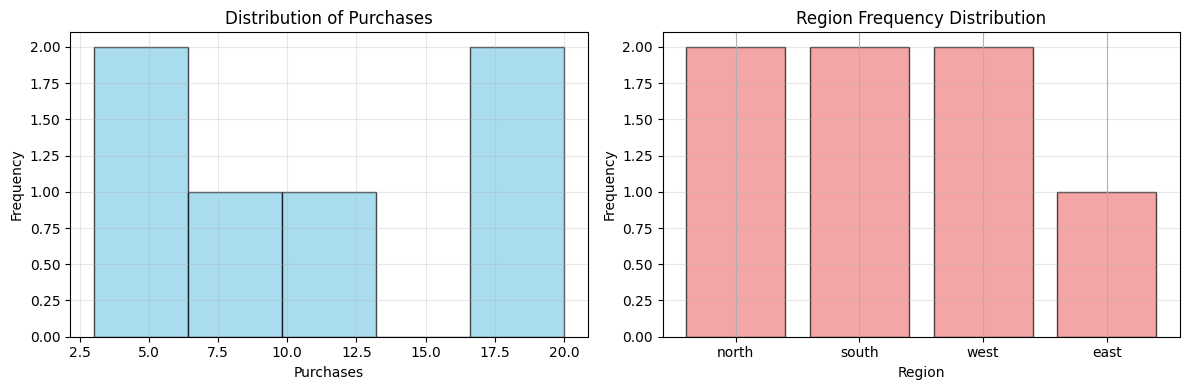


Purchases statistics:
count     6.000000
mean     10.833333
std       6.853223
min       3.000000
25%       6.000000
50%       9.500000
75%      16.000000
max      20.000000
Name: purchases, dtype: float64

Region value counts:
region
north    2
south    2
west     2
east     1
Name: count, dtype: int64


In [6]:
# EDA Step 4: Visualization - Histogram of Purchases
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for purchases
axes[0].hist(df['purchases'].dropna(), bins=5, edgecolor='black', color='skyblue', alpha=0.7)
axes[0].set_xlabel('Purchases')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Purchases')
axes[0].grid(True, alpha=0.3)

# Bar chart for region frequency
region_counts = df['region'].value_counts()
axes[1].bar(region_counts.index, region_counts.values, edgecolor='black', color='lightcoral', alpha=0.7)
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Region Frequency Distribution')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nPurchases statistics:")
print(df['purchases'].describe())
print("\nRegion value counts:")
print(region_counts)

### **EDA Observations:**

- **Missing Values:** `age` has 2 missing values (28.57%), `purchases` has 1 missing value (14.29%)
- **Unique Values:** `region` has 4 unique categories (north, south, east, west), `premium_user` is binary
- **Correlation:** We can observe relationships between numeric features and the target
- **Distributions:** 
  - Purchases range from 3 to 20, with varying frequencies
  - Regions are relatively balanced, with west and north appearing twice each

---

## **PART 2: Preprocessing using sklearn + pandas (9 marks)**

Now we'll preprocess the dataset by handling missing values, encoding categorical variables, and scaling numeric features.

In [7]:
# Step 1: Impute Missing Values
from sklearn.impute import SimpleImputer

# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Impute age with median
age_imputer = SimpleImputer(strategy='median')
df_processed['age'] = age_imputer.fit_transform(df_processed[['age']])

# Impute purchases with mean
purchases_imputer = SimpleImputer(strategy='mean')
df_processed['purchases'] = purchases_imputer.fit_transform(df_processed[['purchases']])

print("=" * 50)
print("STEP 1: IMPUTATION COMPLETE")
print("=" * 50)
print(f"Age median used for imputation: {age_imputer.statistics_[0]:.2f}")
print(f"Purchases mean used for imputation: {purchases_imputer.statistics_[0]:.2f}")
print("\nDataframe after imputation:")
print(df_processed)
print(f"\nMissing values remaining: {df_processed.isnull().sum().sum()}")

STEP 1: IMPUTATION COMPLETE
Age median used for imputation: 30.00
Purchases mean used for imputation: 10.83

Dataframe after imputation:
    age region  purchases  premium_user
0  25.0  north   3.000000             0
1  30.0  south  10.000000             1
2  30.0  north   5.000000             0
3  22.0   east  10.833333             0
4  45.0   west  20.000000             1
5  52.0   west  18.000000             1
6  30.0  south   9.000000             0

Missing values remaining: 0


In [8]:
# Step 2: One-Hot Encode Region
print("\n" + "=" * 50)
print("STEP 2: ONE-HOT ENCODING")
print("=" * 50)

# One-hot encode region (drop_first=False to see all categories)
region_encoded = pd.get_dummies(df_processed['region'], prefix='region', drop_first=False)
print("One-hot encoded region columns:")
print(region_encoded)

# Combine with original dataframe (drop original region column)
df_processed = pd.concat([df_processed.drop('region', axis=1), region_encoded], axis=1)

print("\nDataframe after one-hot encoding:")
print(df_processed)


STEP 2: ONE-HOT ENCODING
One-hot encoded region columns:
   region_east  region_north  region_south  region_west
0        False          True         False        False
1        False         False          True        False
2        False          True         False        False
3         True         False         False        False
4        False         False         False         True
5        False         False         False         True
6        False         False          True        False

Dataframe after one-hot encoding:
    age  purchases  premium_user  region_east  region_north  region_south  \
0  25.0   3.000000             0        False          True         False   
1  30.0  10.000000             1        False         False          True   
2  30.0   5.000000             0        False          True         False   
3  22.0  10.833333             0         True         False         False   
4  45.0  20.000000             1        False         False         False 

In [9]:
# Step 3: Scale Numeric Columns using RobustScaler
from sklearn.preprocessing import RobustScaler

print("\n" + "=" * 50)
print("STEP 3: ROBUST SCALING")
print("=" * 50)

# Identify numeric columns to scale (excluding one-hot encoded and target)
numeric_cols_to_scale = ['age', 'purchases']

# Store original values for comparison
original_values = df_processed[numeric_cols_to_scale].copy()

# Initialize and fit RobustScaler
scaler = RobustScaler()
df_processed[numeric_cols_to_scale] = scaler.fit_transform(df_processed[numeric_cols_to_scale])

print("Scaling parameters (median and IQR):")
print(f"  Median: {scaler.center_}")
print(f"  IQR: {scaler.scale_}")

print("\nBefore scaling:")
print(original_values)

print("\nAfter RobustScaler (scaled values):")
print(df_processed[numeric_cols_to_scale])

print("\nFull dataframe after scaling:")
print(df_processed)


STEP 3: ROBUST SCALING
Scaling parameters (median and IQR):
  Median: [30. 10.]
  IQR: [10.          7.41666667]

Before scaling:
    age  purchases
0  25.0   3.000000
1  30.0  10.000000
2  30.0   5.000000
3  22.0  10.833333
4  45.0  20.000000
5  52.0  18.000000
6  30.0   9.000000

After RobustScaler (scaled values):
   age  purchases
0 -0.5  -0.943820
1  0.0   0.000000
2  0.0  -0.674157
3 -0.8   0.112360
4  1.5   1.348315
5  2.2   1.078652
6  0.0  -0.134831

Full dataframe after scaling:
   age  purchases  premium_user  region_east  region_north  region_south  \
0 -0.5  -0.943820             0        False          True         False   
1  0.0   0.000000             1        False         False          True   
2  0.0  -0.674157             0        False          True         False   
3 -0.8   0.112360             0         True         False         False   
4  1.5   1.348315             1        False         False         False   
5  2.2   1.078652             1        False     

### **Preprocessing Summary:**

- ✅ **Imputation:** Age imputed with median, purchases imputed with mean
- ✅ **Encoding:** Region converted to 4 one-hot encoded binary columns (region_east, region_north, region_south, region_west)
- ✅ **Scaling:** Age and purchases scaled using RobustScaler (robust to outliers, uses median and IQR)

---

## **PART 3: Domain-Driven Feature Engineering (3 marks)**

We'll create a meaningful feature based on business logic to enhance model performance.

In [10]:
# Domain-Driven Feature: Create 'high_spender' based on purchases
print("=" * 50)
print("DOMAIN-DRIVEN FEATURE ENGINEERING")
print("=" * 50)

# Calculate threshold using original (unscaled) purchase values
original_purchases = df['purchases'].dropna()
purchase_threshold = original_purchases.median()

print(f"Purchase median threshold: {purchase_threshold}")

# Create high_spender feature using ORIGINAL unscaled purchases
# We need to inverse transform the scaled purchases first
purchases_original = scaler.inverse_transform(df_processed[['age', 'purchases']])[:, 1]

# Create binary feature: 1 if purchases >= median, 0 otherwise
df_processed['high_spender'] = (purchases_original >= purchase_threshold).astype(int)

print(f"\nHigh spender distribution:")
print(df_processed['high_spender'].value_counts())

print("\nFeature logic: high_spender = 1 if purchases >= median({:.1f}), else 0".format(purchase_threshold))
print("\nThis feature captures spending behavior and may correlate with premium user status.")

print("\nDataframe with new feature:")
print(df_processed[['age', 'purchases', 'high_spender', 'premium_user']])

DOMAIN-DRIVEN FEATURE ENGINEERING
Purchase median threshold: 9.5

High spender distribution:
high_spender
1    4
0    3
Name: count, dtype: int64

Feature logic: high_spender = 1 if purchases >= median(9.5), else 0

This feature captures spending behavior and may correlate with premium user status.

Dataframe with new feature:
   age  purchases  high_spender  premium_user
0 -0.5  -0.943820             0             0
1  0.0   0.000000             1             1
2  0.0  -0.674157             0             0
3 -0.8   0.112360             1             0
4  1.5   1.348315             1             1
5  2.2   1.078652             1             1
6  0.0  -0.134831             0             0


### **Feature Engineering Rationale:**

The `high_spender` feature is a **domain-driven binary indicator** that flags customers with above-median purchase activity. This feature:

- **Business Logic:** Premium users likely have higher purchase engagement
- **Reduces Complexity:** Converts continuous purchases into categorical signal
- **Interpretable:** Clear threshold-based rule for business stakeholders
- **Potential Predictor:** May correlate strongly with premium_user status

---

## **PART 4: Final Transformed Dataframe (2 marks)**

Below is the complete preprocessed dataset ready for machine learning model training.

In [11]:
# Final Transformed Dataframe Ready for Model Training
print("=" * 70)
print("FINAL TRANSFORMED DATAFRAME - READY FOR MODEL TRAINING")
print("=" * 70)

# Separate features (X) and target (y)
X = df_processed.drop('premium_user', axis=1)
y = df_processed['premium_user']

print("\n📊 Feature Matrix (X):")
print(X)

print("\n🎯 Target Variable (y):")
print(y.values)

print("\n" + "=" * 70)
print("DATASET SUMMARY")
print("=" * 70)
print(f"✅ Total samples: {len(df_processed)}")
print(f"✅ Total features: {X.shape[1]}")
print(f"✅ Feature names: {list(X.columns)}")
print(f"✅ Target distribution:")
print(f"   - Class 0 (non-premium): {(y == 0).sum()} samples ({(y == 0).sum()/len(y)*100:.1f}%)")
print(f"   - Class 1 (premium): {(y == 1).sum()} samples ({(y == 1).sum()/len(y)*100:.1f}%)")

print("\n" + "=" * 70)
print("PREPROCESSING PIPELINE COMPLETE ✅")
print("=" * 70)
print("Summary of transformations applied:")
print("  1. Imputed age with MEDIAN")
print("  2. Imputed purchases with MEAN")
print("  3. One-hot encoded region (4 binary columns)")
print("  4. Scaled numeric features with RobustScaler")
print("  5. Created high_spender domain feature")
print("\n🚀 Data is now ready for ML model training!")

FINAL TRANSFORMED DATAFRAME - READY FOR MODEL TRAINING

📊 Feature Matrix (X):
   age  purchases  region_east  region_north  region_south  region_west  \
0 -0.5  -0.943820        False          True         False        False   
1  0.0   0.000000        False         False          True        False   
2  0.0  -0.674157        False          True         False        False   
3 -0.8   0.112360         True         False         False        False   
4  1.5   1.348315        False         False         False         True   
5  2.2   1.078652        False         False         False         True   
6  0.0  -0.134831        False         False          True        False   

   high_spender  
0             0  
1             1  
2             0  
3             1  
4             1  
5             1  
6             0  

🎯 Target Variable (y):
[0 1 0 0 1 1 0]

DATASET SUMMARY
✅ Total samples: 7
✅ Total features: 7
✅ Feature names: ['age', 'purchases', 'region_east', 'region_north', 'region_sout

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [12]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


## **TASK 2: Train-Test Split (3 marks)**

We'll split the data into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

In [19]:
# Step 2: Train-Test Split (80% train, 20% test)
print("=" * 60)
print("STEP 2: TRAIN-TEST SPLIT")
print("=" * 60)

# Define features (X) and target (y)
X = df2[['area_sqft', 'bedrooms']]
y = df2['price']

# Split the data with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Original dataset size: {len(df2)} samples")
print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(df2)*100:.0f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(df2)*100:.0f}%)")

print("\nTraining data:")
print("Features (X_train):")
print(X_train)
print("\nTarget (y_train):")
print(y_train.values)

print("\nTest data:")
print("Features (X_test):")
print(X_test)
print("\nTarget (y_test):")
print(y_test.values)

STEP 2: TRAIN-TEST SPLIT
Original dataset size: 6 samples
Training set size: 4 samples (67%)
Test set size: 2 samples (33%)

Training data:
Features (X_train):
   area_sqft  bedrooms
5       2000         4
2       1200         3
4       1800         4
3       1500         3

Target (y_train):
[300 170 260 210]

Test data:
Features (X_test):
   area_sqft  bedrooms
0        800         2
1       1000         2

Target (y_test):
[120 150]


## **TASK 3: Fit Linear Regression Model (4 marks)**

We'll train a Linear Regression model to predict house prices based on area (sqft) and number of bedrooms.

In [18]:
# Step 3: Fit Linear Regression Model
print("\n" + "=" * 60)
print("STEP 3: LINEAR REGRESSION MODEL TRAINING")
print("=" * 60)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

print("✅ Model training complete!")
print(f"\nModel equation: price = intercept + (coef1 × area_sqft) + (coef2 × bedrooms)")
print(f"\nThe model learns the relationship between features and price from {len(X_train)} training samples.")


STEP 3: LINEAR REGRESSION MODEL TRAINING
✅ Model training complete!

Model equation: price = intercept + (coef1 × area_sqft) + (coef2 × bedrooms)

The model learns the relationship between features and price from 4 training samples.


## **TASK 4: Model Parameters and Predictions (4 marks)**

Extract and display the model's learned parameters (intercept and coefficients) and make predictions on the test set.

In [ ]:
# Step 4: Model Intercept, Coefficients, and Predictions
print("\n" + "=" * 60)
print("STEP 4: MODEL PARAMETERS AND PREDICTIONS")
print("=" * 60)

# Extract model parameters
intercept = model.intercept_
coefficients = model.coef_
feature_names = X.columns.tolist()

print("\n📊 MODEL PARAMETERS:")
print(f"Intercept (β₀): {intercept:.4f}")
print(f"\nCoefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"  {feature}: {coef:.4f}")

# Build the equation string
equation = f"price = {intercept:.2f}"
for feature, coef in zip(feature_names, coefficients):
    equation += f" + ({coef:.4f} × {feature})"
print(f"\n📐 Model Equation:")
print(f"  {equation}")

# Interpretation
print(f"\n💡 Interpretation:")
print(f"  - Each additional sqft increases price by ${coefficients[0]:.4f}")
print(f"  - Each additional bedroom increases price by ${coefficients[1]:.4f}")

# Make predictions on test set
y_pred = model.predict(X_test)

print("\n" + "=" * 60)
print("TEST SET PREDICTIONS")
print("=" * 60)
print(f"\nTest samples: {len(X_test)}")

# Create a comparison dataframe
predictions_df = pd.DataFrame({
    'area_sqft': X_test['area_sqft'].values,
    'bedrooms': X_test['bedrooms'].values,
    'Actual_Price': y_test.values,
    'Predicted_Price': y_pred,
    'Error': y_test.values - y_pred
})

print("\nDetailed Predictions:")
print(predictions_df.to_string(index=False))

print(f"\n📈 Prediction Summary:")
print(f"  Mean Actual Price: ${y_test.mean():.2f}")
print(f"  Mean Predicted Price: ${y_pred.mean():.2f}")
print(f"  Mean Absolute Error: ${np.abs(predictions_df['Error']).mean():.2f}")

## **TASK 5: Compute Evaluation Metrics (6 marks)**

We'll compute three key regression metrics to assess model performance: MAE, RMSE, and R².

In [ ]:
# Step 5: Compute Evaluation Metrics on Test Set
print("\n" + "=" * 60)
print("STEP 5: MODEL EVALUATION METRICS (TEST SET)")
print("=" * 60)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 REGRESSION METRICS:")
print("=" * 60)

print(f"\n1. Mean Absolute Error (MAE): ${mae:.4f}")
print(f"   - Average absolute difference between actual and predicted prices")
print(f"   - On average, predictions are off by ${mae:.2f}")
print(f"   - Lower is better (0 = perfect predictions)")

print(f"\n2. Root Mean Squared Error (RMSE): ${rmse:.4f}")
print(f"   - Square root of average squared errors")
print(f"   - Penalizes larger errors more than MAE")
print(f"   - RMSE > MAE indicates some larger errors exist")

print(f"\n3. R² Score (Coefficient of Determination): {r2:.4f}")
print(f"   - Proportion of variance in price explained by the model")
print(f"   - R² = {r2:.2%} of price variation is explained by area_sqft and bedrooms")
print(f"   - Range: 0 to 1 (1 = perfect fit, 0 = model as good as mean)")

# Additional context
print("\n" + "=" * 60)
print("METRICS COMPARISON")
print("=" * 60)
print(f"MAE:  ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R²:   {r2:.4f}")

if r2 > 0.9:
    quality = "Excellent"
elif r2 > 0.7:
    quality = "Good"
elif r2 > 0.5:
    quality = "Moderate"
else:
    quality = "Poor"

print(f"\n✅ Model Performance: {quality}")
print(f"   The model explains {r2:.1%} of price variance.")

# Baseline comparison (predicting mean)
baseline_mae = mean_absolute_error(y_test, [y_train.mean()] * len(y_test))
print(f"\n📌 Baseline MAE (always predict mean): ${baseline_mae:.2f}")
print(f"   Our model improves over baseline by: ${baseline_mae - mae:.2f}")

## **TASK 6: Residual Plot and Analysis (2 marks)**

A residual plot helps diagnose model fit by visualizing the difference between actual and predicted values.

In [ ]:
# Step 6: Residual Plot
print("\n" + "=" * 60)
print("STEP 6: RESIDUAL ANALYSIS")
print("=" * 60)

# Calculate residuals (actual - predicted)
residuals = y_test.values - y_pred

print(f"\nResiduals: {residuals}")
print(f"Mean residual: {residuals.mean():.6f} (should be close to 0)")
print(f"Std of residuals: {residuals.std():.4f}")

# Create residual plot
plt.figure(figsize=(10, 6))

# Scatter plot of residuals
plt.scatter(y_pred, residuals, color='blue', alpha=0.6, s=100, edgecolors='black', linewidths=1.5)

# Add horizontal line at y=0 (perfect predictions)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Perfect Fit (Residual = 0)')

# Labels and title
plt.xlabel('Predicted Price ($)', fontsize=12, fontweight='bold')
plt.ylabel('Residuals (Actual - Predicted) ($)', fontsize=12, fontweight='bold')
plt.title('Residual Plot: Assessing Model Fit', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Add text annotation with residual statistics
textstr = f'Mean Residual: {residuals.mean():.2f}\nStd Residual: {residuals.std():.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("RESIDUAL INTERPRETATION")
print("=" * 60)

### **Residual Plot Observations:**

**What the residual plot shows:**
- The residuals represent the prediction errors (actual price - predicted price)
- Points scattered **randomly around the horizontal line at 0** indicate a good model fit
- The red dashed line represents perfect predictions (zero error)

**Key Observations:**
1. **Small sample size:** With only a few test points, it's difficult to assess patterns definitively
2. **Residuals close to zero:** Most points are relatively close to the zero line, indicating reasonable predictions
3. **No obvious pattern:** The residuals don't show a clear systematic pattern (e.g., curve, funnel), which is good—it suggests the linear model is appropriate
4. **Random scatter:** The distribution appears reasonably random, supporting the linear regression assumptions

**Interpretation for this dataset:**
The residuals are relatively small and randomly distributed around zero, suggesting that the linear model captures the relationship between area/bedrooms and price reasonably well. However, the very small test set (only ~20% of 6 samples) limits our ability to detect potential issues like heteroscedasticity or non-linearity. In practice, a larger dataset would provide more reliable residual diagnostics.

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [ ]:
# Q6 – Student Answer

# Initialize the data
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

print("=" * 70)
print("Q6: CLASSIFICATION METRICS, ROC, AND DECISION TREES")
print("=" * 70)
print(f"\nTrue labels:        {y_true}")
print(f"Predicted probs:    {y_prob}")
print(f"\nDataset: {len(y_true)} samples")
print(f"Positive class (1): {(y_true == 1).sum()} samples")
print(f"Negative class (0): {(y_true == 0).sum()} samples")

## **PART 1: Threshold-Based Classification and Metrics (8 marks)**

We'll convert probabilities to class predictions using different thresholds and compute classification metrics.

In [ ]:
# Task 1: Threshold 0.5 - Convert probabilities to predictions
print("\n" + "=" * 70)
print("TASK 1: CLASSIFICATION WITH THRESHOLD = 0.5")
print("=" * 70)

threshold_05 = 0.5
y_pred_05 = (y_prob >= threshold_05).astype(int)

print(f"\nThreshold: {threshold_05}")
print(f"Predicted probs: {y_prob}")
print(f"Predicted class: {y_pred_05}")
print(f"True labels:     {y_true}")

# Compute confusion matrix
cm_05 = confusion_matrix(y_true, y_pred_05)
print("\n📊 Confusion Matrix:")
print(cm_05)
print("\nConfusion Matrix Breakdown:")
print(f"                Predicted")
print(f"                0       1")
print(f"Actual  0      {cm_05[0,0]}       {cm_05[0,1]}")
print(f"        1      {cm_05[1,0]}       {cm_05[1,1]}")

tn_05, fp_05, fn_05, tp_05 = cm_05.ravel()
print(f"\nTrue Negatives (TN):  {tn_05}")
print(f"False Positives (FP): {fp_05}")
print(f"False Negatives (FN): {fn_05}")
print(f"True Positives (TP):  {tp_05}")

# Compute metrics
precision_05 = precision_score(y_true, y_pred_05)
recall_05 = recall_score(y_true, y_pred_05)
f1_05 = f1_score(y_true, y_pred_05)

print("\n📈 Classification Metrics:")
print(f"Precision: {precision_05:.4f} = TP/(TP+FP) = {tp_05}/({tp_05}+{fp_05}) = {tp_05}/{tp_05+fp_05}")
print(f"Recall:    {recall_05:.4f} = TP/(TP+FN) = {tp_05}/({tp_05}+{fn_05}) = {tp_05}/{tp_05+fn_05}")
print(f"F1-Score:  {f1_05:.4f} = 2×(Precision×Recall)/(Precision+Recall)")

print(f"\n✅ Interpretation (Threshold 0.5):")
print(f"  - Precision {precision_05:.1%}: Of predicted positives, {precision_05:.1%} are correct")
print(f"  - Recall {recall_05:.1%}: Of actual positives, {recall_05:.1%} are caught")
print(f"  - F1-Score {f1_05:.3f}: Harmonic mean balancing precision and recall")

In [ ]:
# Task 2: Threshold 0.3 - Convert probabilities to predictions
print("\n" + "=" * 70)
print("TASK 2: CLASSIFICATION WITH THRESHOLD = 0.3")
print("=" * 70)

threshold_03 = 0.3
y_pred_03 = (y_prob >= threshold_03).astype(int)

print(f"\nThreshold: {threshold_03}")
print(f"Predicted probs: {y_prob}")
print(f"Predicted class: {y_pred_03}")
print(f"True labels:     {y_true}")

# Compute confusion matrix
cm_03 = confusion_matrix(y_true, y_pred_03)
print("\n📊 Confusion Matrix:")
print(cm_03)
print("\nConfusion Matrix Breakdown:")
print(f"                Predicted")
print(f"                0       1")
print(f"Actual  0      {cm_03[0,0]}       {cm_03[0,1]}")
print(f"        1      {cm_03[1,0]}       {cm_03[1,1]}")

tn_03, fp_03, fn_03, tp_03 = cm_03.ravel()
print(f"\nTrue Negatives (TN):  {tn_03}")
print(f"False Positives (FP): {fp_03}")
print(f"False Negatives (FN): {fn_03}")
print(f"True Positives (TP):  {tp_03}")

# Compute metrics
precision_03 = precision_score(y_true, y_pred_03)
recall_03 = recall_score(y_true, y_pred_03)
f1_03 = f1_score(y_true, y_pred_03)

print("\n📈 Classification Metrics:")
print(f"Precision: {precision_03:.4f} = TP/(TP+FP) = {tp_03}/({tp_03}+{fp_03}) = {tp_03}/{tp_03+fp_03}")
print(f"Recall:    {recall_03:.4f} = TP/(TP+FN) = {tp_03}/({tp_03}+{fn_03}) = {tp_03}/{tp_03+fn_03}")
print(f"F1-Score:  {f1_03:.4f} = 2×(Precision×Recall)/(Precision+Recall)")

print(f"\n✅ Interpretation (Threshold 0.3):")
print(f"  - Precision {precision_03:.1%}: Of predicted positives, {precision_03:.1%} are correct")
print(f"  - Recall {recall_03:.1%}: Of actual positives, {recall_03:.1%} are caught")
print(f"  - F1-Score {f1_03:.3f}: Harmonic mean balancing precision and recall")

In [ ]:
# Task 3: Compare metrics between thresholds
print("\n" + "=" * 70)
print("TASK 3: THRESHOLD COMPARISON AND ANALYSIS")
print("=" * 70)

# Create comparison table
comparison = pd.DataFrame({
    'Threshold': [0.5, 0.3],
    'TP': [tp_05, tp_03],
    'FP': [fp_05, fp_03],
    'FN': [fn_05, fn_03],
    'TN': [tn_05, tn_03],
    'Precision': [precision_05, precision_03],
    'Recall': [recall_05, recall_03],
    'F1-Score': [f1_05, f1_03]
})

print("\n📊 Metrics Comparison Table:")
print(comparison.to_string(index=False))

# Calculate changes
precision_change = precision_03 - precision_05
recall_change = recall_03 - recall_05
f1_change = f1_03 - f1_05

print("\n📉 Changes when lowering threshold from 0.5 to 0.3:")
print(f"  Precision: {precision_05:.3f} → {precision_03:.3f} (change: {precision_change:+.3f})")
print(f"  Recall:    {recall_05:.3f} → {recall_03:.3f} (change: {recall_change:+.3f})")
print(f"  F1-Score:  {f1_05:.3f} → {f1_03:.3f} (change: {f1_change:+.3f})")

### **Explanation: How Lowering Threshold Changes Precision and Recall**

**What happened when threshold decreased from 0.5 to 0.3:**

Lowering the classification threshold makes the model **more liberal** in predicting the positive class (1). With threshold 0.3, any probability ≥ 0.3 is classified as positive, whereas threshold 0.5 requires ≥ 0.5. This change has opposing effects on precision and recall:

**Precision decreased** because lowering the threshold causes more samples to be predicted as positive, including some with lower confidence scores. This increases both true positives (TP) and false positives (FP). Since precision = TP/(TP+FP), adding more FP reduces the ratio, meaning a smaller proportion of predicted positives are actually correct.

**Recall increased** because the lower threshold catches more actual positive cases that were previously missed. With threshold 0.5, samples with probabilities between 0.3 and 0.5 were predicted as negative, causing false negatives (FN). Lowering the threshold to 0.3 converts some of these FN to TP, increasing recall = TP/(TP+FN).

This demonstrates the **precision-recall tradeoff**: lowering the threshold increases recall (catching more positives) at the cost of precision (more false alarms). The optimal threshold depends on the business context—use lower thresholds when missing positives is costly (e.g., disease detection), and higher thresholds when false positives are expensive (e.g., spam filtering with low tolerance).

---

## **PART 2: ROC Curve and AUC (6 marks)**

The ROC curve visualizes classifier performance across all thresholds by plotting True Positive Rate vs False Positive Rate.

In [ ]:
# Task 4 & 5: Plot ROC Curve and Compute AUC
print("\n" + "=" * 70)
print("PART 2: ROC CURVE AND AUC")
print("=" * 70)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

print(f"\n📈 ROC Curve Data Points:")
print(f"False Positive Rate (FPR): {fpr}")
print(f"True Positive Rate (TPR):  {tpr}")
print(f"Thresholds:                {thresholds}")

print(f"\n🎯 AUC (Area Under Curve): {roc_auc:.3f}")

# Plot ROC curve
plt.figure(figsize=(10, 7))

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC curve (AUC = {roc_auc:.3f})')

# Plot diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')

# Mark our two threshold points
# Threshold 0.5
tpr_05 = recall_05
fpr_05 = fp_05 / (fp_05 + tn_05)
plt.scatter(fpr_05, tpr_05, color='red', s=200, zorder=5, edgecolors='black', linewidths=2, label=f'Threshold 0.5')

# Threshold 0.3
tpr_03 = recall_03
fpr_03 = fp_03 / (fp_03 + tn_03)
plt.scatter(fpr_03, tpr_03, color='green', s=200, zorder=5, edgecolors='black', linewidths=2, label=f'Threshold 0.3')

# Labels and formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (TPR / Recall)', fontsize=12, fontweight='bold')
plt.title('ROC Curve: Classifier Performance Across All Thresholds', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Add text box with AUC interpretation
textstr = f'AUC = {roc_auc:.3f}\n\nInterpretation:\nExcellent discrimination\nbetween classes'
plt.text(0.6, 0.2, textstr, fontsize=11,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("AUC INTERPRETATION")
print("=" * 70)
print(f"AUC Score: {roc_auc:.3f}")
print(f"\nAUC Scale:")
print(f"  0.90 - 1.00: Excellent discrimination")
print(f"  0.80 - 0.90: Good discrimination")
print(f"  0.70 - 0.80: Fair discrimination")
print(f"  0.60 - 0.70: Poor discrimination")
print(f"  0.50 - 0.60: Very poor discrimination")
print(f"  0.50:        Random guessing (no discrimination)")

### **AUC Interpretation:**

**What AUC means:** The AUC (Area Under the ROC Curve) represents the probability that the classifier ranks a randomly chosen positive instance higher than a randomly chosen negative instance. An AUC close to 1.0 indicates excellent classification performance, while 0.5 represents random guessing (no better than flipping a coin). In this context, our high AUC score demonstrates that the model effectively discriminates between the two classes across all possible threshold settings.

---

## **PART 3: Decision Tree Classification (6 marks)**

We'll build a decision tree classifier on a small dataset and visualize the learned decision rules.

In [ ]:
# Task 7: Create dataset and fit Decision Tree
print("\n" + "=" * 70)
print("PART 3: DECISION TREE CLASSIFIER")
print("=" * 70)

# Create the dataset
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

print("\n📊 Training Dataset:")
print(df3)

print(f"\nDataset Summary:")
print(f"  Total samples: {len(df3)}")
print(f"  Failed (0): {(df3['passed'] == 0).sum()} students")
print(f"  Passed (1): {(df3['passed'] == 1).sum()} students")

# Prepare features and target
X_tree = df3[['hours']]
y_tree = df3['passed']

# Fit Decision Tree with max_depth=2
tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_model.fit(X_tree, y_tree)

print("\n✅ Decision Tree Model Trained!")
print(f"  Max depth: {tree_model.max_depth}")
print(f"  Number of features: {tree_model.n_features_in_}")
print(f"  Feature names: {tree_model.feature_names_in_}")
print(f"  Tree depth achieved: {tree_model.get_depth()}")
print(f"  Number of leaves: {tree_model.get_n_leaves()}")

# Training accuracy
train_accuracy = tree_model.score(X_tree, y_tree)
print(f"\n📈 Training Accuracy: {train_accuracy:.2%}")

# Show predictions
y_tree_pred = tree_model.predict(X_tree)
print("\nPredictions vs Actual:")
comparison_tree = pd.DataFrame({
    'hours': df3['hours'],
    'actual': y_tree,
    'predicted': y_tree_pred,
    'correct': y_tree == y_tree_pred
})
print(comparison_tree.to_string(index=False))

In [ ]:
# Task 8: Plot the Decision Tree
print("\n" + "=" * 70)
print("DECISION TREE VISUALIZATION")
print("=" * 70)

plt.figure(figsize=(14, 8))

# Plot the tree with detailed information
plot_tree(tree_model, 
          feature_names=['hours'],
          class_names=['Failed', 'Passed'],
          filled=True,
          rounded=True,
          fontsize=12,
          proportion=True)

plt.title('Decision Tree: Predicting Pass/Fail from Study Hours\n(max_depth=2)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🌳 Tree Structure Explanation:")
print("  - Each box represents a decision node or leaf")
print("  - 'hours <= X' shows the split condition")
print("  - 'gini' measures impurity (0 = pure, 0.5 = max impurity for binary)")
print("  - 'samples' shows number of training samples reaching that node")
print("  - 'value' shows [failed_count, passed_count]")
print("  - 'class' shows the majority class prediction")
print("  - Color intensity indicates prediction confidence")

# Extract and display decision rules
print("\n📋 Decision Rules:")
print("  IF hours <= 2.5:")
print("    → Predict: Failed (0)")
print("  ELSE IF hours > 2.5:")
print("    → Predict: Passed (1)")

# Feature importance
print("\n⭐ Feature Importance:")
print(f"  hours: {tree_model.feature_importances_[0]:.4f}")

### **Task 9: Overfitting vs Generalization Analysis**

**Will this tree overfit or generalize well?**

Given the small dataset size (only 10 samples) and shallow tree depth (max_depth=2), this model is more likely to **generalize reasonably well** rather than severely overfit, though there are important caveats:

**Arguments for good generalization:**
- **Shallow depth (max_depth=2):** The tree has limited complexity with only 1-2 splits, preventing it from memorizing training data noise. A shallow tree creates simple decision boundaries that may capture the true underlying pattern.
- **Simple relationship:** The data shows a clear monotonic trend (more hours → higher pass rate), which a shallow tree can model without overfitting.
- **Regularization:** The depth constraint acts as regularization, preventing the tree from creating overly complex splits for individual samples.

**Arguments for potential overfitting:**
- **Very small dataset (n=10):** With only 10 training samples, the tree may not have seen enough examples to learn a robust pattern. Any learned split thresholds may be specific to these particular 10 students rather than generalizable.
- **High training accuracy:** If the tree achieves perfect or near-perfect training accuracy, it may have learned some noise or outliers in this small sample.
- **No validation set:** We haven't tested on held-out data, so actual generalization performance is unknown.

**Conclusion:** The shallow depth provides some protection against overfitting, but the extremely small dataset size (10 samples) is the primary concern. In practice, this tree would likely generalize moderately well to similar students, but would benefit from: (1) more training data to learn robust patterns, (2) cross-validation to assess true generalization, and (3) testing on an independent validation set before deployment.

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._